<a href="https://colab.research.google.com/github/leaop/Graduation/blob/main/exercicios_aula_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('titanic.csv')

A base de dados Titanic representa informações sobre os passageiros do navio Titanic, que naufragou em 1912. A base contém informações como a classe em que o passageiro viajou, o sexo, a idade, o número de irmãos/cônjuges a bordo, o número de pais/filhos a bordo, a tarifa paga, o porto de embarque, se sobreviveu ou não, entre outras.

# 1 - Qual a quantidade de passageiros que sobreviveram e que não sobreviveram?

In [12]:
df.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Cônjuges a bordo,Pais/Filhos a bordo,Tarifa
0,0,Terceira,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,Primeira,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,Terceira,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,Primeira,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,Terceira,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [13]:
df.Sobreviveu.value_counts()

Sobreviveu
0    545
1    342
Name: count, dtype: int64

# 2 - Qual a porcentagem de homens e a porcentagem de mulheres que sobreviveram?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sobreviveu               887 non-null    int32  
 1   Classe                   887 non-null    object 
 2   Nome                     887 non-null    object 
 3   Sexo                     887 non-null    int32  
 4   Idade                    887 non-null    float64
 5   Irmãos/Cônjuges a bordo  887 non-null    int64  
 6   Pais/Filhos a bordo      887 non-null    int64  
 7   Tarifa                   887 non-null    float64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 48.6+ KB


In [7]:
df.loc[df['Sexo'] == 'Feminino', 'Sexo'] = 0
df.loc[df['Sexo'] == 'Masculino', 'Sexo'] = 1
df.loc[df['Sobreviveu'] == 'Sim', 'Sobreviveu'] = 1
df.loc[df['Sobreviveu'] == 'Não', 'Sobreviveu'] = 0


In [9]:
df['Sexo'] = df['Sexo'].astype(int)
df['Sobreviveu'] = df['Sobreviveu'].astype(int)

In [15]:
#primeira opção de groupby (média de sobreviventes)
media_sobrevivencia_por_genero = df.groupby('Sexo')['Sobreviveu'].mean()
print(media_sobrevivencia_por_genero)


Sexo
0    0.742038
1    0.190227
Name: Sobreviveu, dtype: float64


In [16]:
# Filtrar os dados para obter apenas as linhas onde 'survived' é igual a 1 (sobreviventes)
sobreviventes = df[df['Sobreviveu'] == 1]

# Calcular o total de homens e mulheres sobreviventes
total_homens_sobreviventes = sobreviventes[sobreviventes['Sexo'] == 0].shape[0]
total_mulheres_sobreviventes = sobreviventes[sobreviventes['Sexo'] == 1].shape[0]

# Calcular a porcentagem de homens e mulheres sobreviventes em relação ao total de sobreviventes
porcentagem_homens_sobreviventes = (total_homens_sobreviventes / sobreviventes.shape[0]) * 100
porcentagem_mulheres_sobreviventes = (total_mulheres_sobreviventes / sobreviventes.shape[0]) * 100

# Exibir os resultados
print(f"Porcentagem de homens sobreviventes: {porcentagem_homens_sobreviventes:.2f}%")
print(f"Porcentagem de mulheres sobreviventes: {porcentagem_mulheres_sobreviventes:.2f}%")


Porcentagem de homens sobreviventes: 68.13%
Porcentagem de mulheres sobreviventes: 31.87%


In [25]:
# Contar o número de ocorrências de homens e mulheres
counts = df['Sexo'].value_counts()

# Calcular a porcentagem de sobreviventes homens e mulheres
survival_rates_male = (df.loc[(df['Sexo'] == 1) & (df['Sobreviveu'] == 1), 'Sexo'].count() / counts[1]) * 100
survival_rates_female = (df.loc[(df['Sexo'] == 0) & (df['Sobreviveu'] == 1), 'Sexo'].count() / counts[0]) * 100

# Exibir as taxas de sobrevivência
print(f"Porcentagem de homens que sobreviveram: {survival_rates_male:.2f}%")
print(f"Porcentagem de mulheres que sobreviveram: {survival_rates_female:.2f}%")


Porcentagem de homens que sobreviveram: 19.02%
Porcentagem de mulheres que sobreviveram: 74.20%


In [ ]:
#metodo do prof
#loc - trava em determinada coluna
#seleção da coluna e dos valores feitas parar estabelecer uma correlação
#shape normalmente retorna a quantidade de registro[0], linhas[1] e colunas[2]
#atribuo uma variável somente com a quantidade de registro e faço a formula depois
total_fem_sob = df.loc[(df['Sexo'] == 'Feminino' ) & (df['Sobreviveu'] == 'Sim')].shape[0]
total_fem =  df.loc[(df['Sexo'] == 'Feminino')].shape[0]

total_fem_sob * 100 / total_fem

# 3 - Qual a idade média dos passageiros?

In [16]:
df['Idade'].describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Idade, dtype: float64

In [17]:
df['Idade'].mean()

29.471443066516347

# 4 - Qual a tarifa média paga pelos passageiros?

In [18]:
df['Tarifa'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Tarifa, dtype: float64

# 5 - Qual a correlação entre a idade e a tarifa paga?

In [19]:
correlation = df['Idade'].corr(df['Tarifa'])
print(f"Correlação entre idade e tarifa paga: {correlation:.2f}")

Correlação entre idade e tarifa paga: 0.11


Como podemos interpretar os valores que ρ pode assumir?

- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ= 0,7 a 09 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação

# 6 - Qual a correlação entre a classe em que o passageiro viajou e a chance de sobrevivência?

In [12]:
#correlacao_pearson = df['Classe'].corr(df['Sobreviveu'], method='pearson')

# 7 - Qual o número médio de irmãos/cônjuges a bordo para quem sobreviveu e para quem não sobreviveu?

In [21]:
df7 = df[['Irmãos/Cônjuges a bordo', 'Sobreviveu']]

In [22]:
# Calcular a média de 'sibsp' para quem sobreviveu e para quem não sobreviveu
media_sobreviveu = df7.loc[df7['Sobreviveu'] == 1, 'Irmãos/Cônjuges a bordo'].mean()
media_nao_sobreviveu = df7.loc[df7['Sobreviveu'] == 0, 'Irmãos/Cônjuges a bordo'].mean()

print("Média de irmãos/cônjuges a bordo para quem sobreviveu: ", media_sobreviveu)
print("Média de irmãos/cônjuges a bordo para quem não sobreviveu: ", media_nao_sobreviveu)


Média de irmãos/cônjuges a bordo para quem sobreviveu:  0.47368421052631576
Média de irmãos/cônjuges a bordo para quem não sobreviveu:  0.5577981651376147


# 8 - Qual o número médio de pais/filhos a bordo para quem sobreviveu e para quem não sobreviveu?

# 9 - Qual a relação entre a tarifa paga e a chance de sobrevivência?

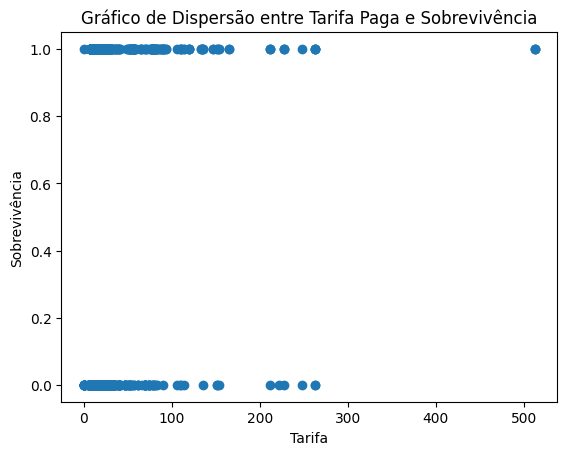

In [23]:
#Aqui poderia se fazer a mesma correlação ou...
import matplotlib.pyplot as plt
plt.scatter(df['Tarifa'], df['Sobreviveu'])
plt.xlabel('Tarifa')
plt.ylabel('Sobrevivência')
plt.title('Gráfico de Dispersão entre Tarifa Paga e Sobrevivência')
plt.show()


# 10 - Qual o porto de embarque que teve mais passageiros a bordo?

# 11 - Faça uma análise exploratória dos dados

# 12 - Faça o tratamento dos dados:
- apagar colunas que não sejam relevantes para o modelo (qual(is) seria(m) esta(s) coluna(s)?)

- Converter os valores textuais em numéricos (não existe somente uma forma para isto, mas já aprendemos a usar a função loc..)


# 13 - Separe os dados em X e y de treinamento e teste.

Note que a nossa classe alvo é a primeiro coluna, que informa se o passageiro sobreviveu ou não

In [3]:
X = df[df.columns[:-1]]
y = df[['Tarifa']]

Normalizar X e y

Em casos de classificação (onde queremos prever uma ou mais classes), não normalizamos os valores da classe alvo, normalizamos apenas os atributos. Já em regressões (que queremos prever um valor numérico contínuo), realizamos a normalização dos atributos e da classe alvo.

In [5]:
#algumas bibliotecas necessárias
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from sklearn.metrics import mean_squared_error

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sobreviveu               887 non-null    int32  
 1   Classe                   887 non-null    object 
 2   Nome                     887 non-null    object 
 3   Sexo                     887 non-null    int32  
 4   Idade                    887 non-null    float64
 5   Irmãos/Cônjuges a bordo  887 non-null    int64  
 6   Pais/Filhos a bordo      887 non-null    int64  
 7   Tarifa                   887 non-null    float64
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 48.6+ KB


In [24]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


scaler_features = MinMaxScaler()
scaler_features.fit(y)
y = scaler_features.transform(y)

ValueError: could not convert string to float: 'Não'

Feita a normalização, agora é hora de fazer a separação em treinamento e teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=19)

# 14 - Normalize apenas os atributos (X).

É importante lembrar que a normalização deve ser aplicada separadamente em cada conjunto de dados (treinamento e teste), utilizando as estatísticas calculadas a partir do conjunto de treinamento. Isso evita vazamento de informação do conjunto de teste para o conjunto de treinamento, o que poderia afetar negativamente a avaliação do modelo.

In [26]:
from sklearn.preprocessing import StandardScaler

# Criar um objeto StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento X_train
scaler.fit(X_train)

# Aplicar o scaler aos dados de treinamento e teste X_train e X_test
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


ValueError: could not convert string to float: 'Não'

# 15 - Use algum modelo de machine learning para prever a classe alvo

# 16 - Exiba a acurácia e a matriz de confusão